<a href="https://colab.research.google.com/github/ukablahblah/Random/blob/main/MEE6_Dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

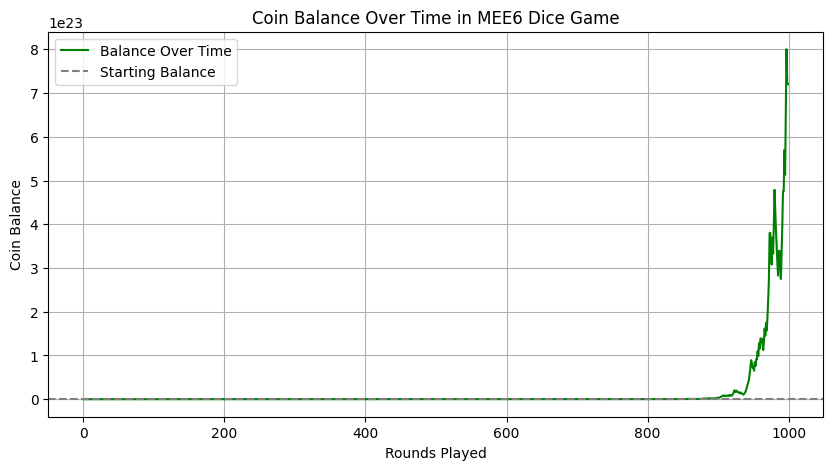

In [1]:
import random
import matplotlib.pyplot as plt

# Game rules: win multipliers
WIN_NORMAL = 2
WIN_DOUBLES = 3
WIN_DOUBLE_SIX = 4
LOSS = -1

# Simulation parameters
initial_balance = 5000  # Starting coins
bet_percentage = 0.1  # Bet 10% of balance per round (adjust if needed)
rounds = 1000  # Number of rounds to play

# Function to roll two dice
def roll_dice():
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    return die1, die2, die1 + die2

# Function to determine the payout based on dice rolls
def calculate_payout(player_roll, bot_roll, bet):
    player_die1, player_die2, player_sum = player_roll
    bot_die1, bot_die2, bot_sum = bot_roll

    if player_sum > bot_sum:
        if player_die1 == player_die2:  # Player rolled doubles
            if player_die1 == 6:  # Double sixes
                return bet * WIN_DOUBLE_SIX
            return bet * WIN_DOUBLES
        return bet * WIN_NORMAL
    elif player_sum == bot_sum:
        return 0  # Draw, no change in balance
    else:
        return bet * LOSS  # Loss

# Simulation function
def play_game(balance, rounds):
    balance_history = []

    for i in range(rounds):
        bet = max(1, int(balance * bet_percentage))  # Ensure bet is at least 1 coin
        player_roll = roll_dice()
        bot_roll = roll_dice()
        payout = calculate_payout(player_roll, bot_roll, bet)

        balance += payout  # Update balance
        balance_history.append(balance)

        if balance <= 0:
            print(f"Game over at round {i+1} (balance = 0).")
            break

    return balance_history

# Run the simulation
balance_history = play_game(initial_balance, rounds)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(balance_history, label="Balance Over Time", color="green")
plt.axhline(y=initial_balance, color="gray", linestyle="--", label="Starting Balance")
plt.xlabel("Rounds Played")
plt.ylabel("Coin Balance")
plt.title("Coin Balance Over Time in MEE6 Dice Game")
plt.legend()
plt.grid()
plt.show()
